In [2]:
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

In [2]:
data_min_max = pd.read_csv('data_skew_imputed_outliers_fixed_min_max.csv')

In [3]:
# all the dataframe columns


data_min_max_columns = ['I1', 'I2', 'I3', 'P(IPO)', 'P(H)',
       'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2',
       'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I3_Imput', 'division',
       'div_manufacturing', 'div_other', 'div_services', 'T1_Imput',
       'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput', 'S1_Imput', 'S2_Imput',
       'S3_Imput', 'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 'P(1Day)_Imput',
       'P(H)_Imput', 'P(L)_Imput', 'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2',
       'C3_cube_root', 'C7_log', 'C5_log', 'C6_log', 'C1_Imput', 'C2_Imput',
       'C3_cube_root_Imput', 'C4_Imput', 'C5_log_Imput', 'C6_log_Imput',
       'C7_log_Imput', 'C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix',
       'C7_log_Imput_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max',
       'C3_cube_root_Imput_min_max', 'C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']

# Min max pipline

In [34]:
# filtered categorical values out
# 'I1', 'I2','division', 'C3','C4', 'C5', 'C6', 'C7', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3''P(IPO)', 'P(H)','T1_Imput', 'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput' 'P(L)', 'P(1Day)'

filter_data_min_max=['T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio',
       'C1_Imput','C4_Imput','C3_cube_root_Imput_p', 'C5_log_Imput_p',
       'C6_log_Imput_p', 'C1_Imput_outliner_fix',
       'C5_log_Imput_p_outliner_fix', 'C6_log_Imput_p_outliner_fix', 'T3_Imput_ratio_outliner_fix',
       'T4_Imput_ratio_outliner_fix', 'T5_Imput_ratio_outliner_fix',
       'S1_Imput_ratio_outliner_fix', 'S2_Imput_ratio_outliner_fix',
       'S3_Imput_ratio_outliner_fix', 'C1_Imput_outliner_fix_min_max',
       'C3_cube_root_Imput_min_max', 'C4_Imput_min_max',
       'C5_log_Imput_p_outliner_fix_min_max',
       'C6_log_Imput_p_outliner_fix_min_max',
       'C7_log_Imput_outliner_fix_min_max',
       'T3_Imput_ratio_outliner_fix_min_max',
       'T4_Imput_ratio_outliner_fix_min_max',
       'T5_Imput_ratio_outliner_fix_min_max',
       'S1_Imput_ratio_outliner_fix_min_max',
       'S2_Imput_ratio_outliner_fix_min_max',
       'S3_Imput_ratio_outliner_fix_min_max']
data_min_max_filtered = data_min_max[filter_data_min_max]
data_min_max_filtered.head(2)

,T4_Imput_ratio,T3_Imput_ratio,T5_Imput_ratio,S1_Imput_ratio,S2_Imput_ratio,S3_Imput_ratio,C1_Imput,C4_Imput,C3_cube_root_Imput_p,C5_log_Imput_p,...,C4_Imput_min_max,C5_log_Imput_p_outliner_fix_min_max,C6_log_Imput_p_outliner_fix_min_max,C7_log_Imput_outliner_fix_min_max,T3_Imput_ratio_outliner_fix_min_max,T4_Imput_ratio_outliner_fix_min_max,T5_Imput_ratio_outliner_fix_min_max,S1_Imput_ratio_outliner_fix_min_max,S2_Imput_ratio_outliner_fix_min_max,S3_Imput_ratio_outliner_fix_min_max
0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,122.0,0.029074,1,-1.083566,...,0.749962,0.495741,0.583333,0.405237,0.638012,0.523556,0.565074,0.422402,0.515574,0.453823
1,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,259.0,-0.013352,0,-1.169308,...,0.583748,0.376259,0.000000,0.317003,0.537617,0.536352,0.483018,0.213730,0.655044,0.449531


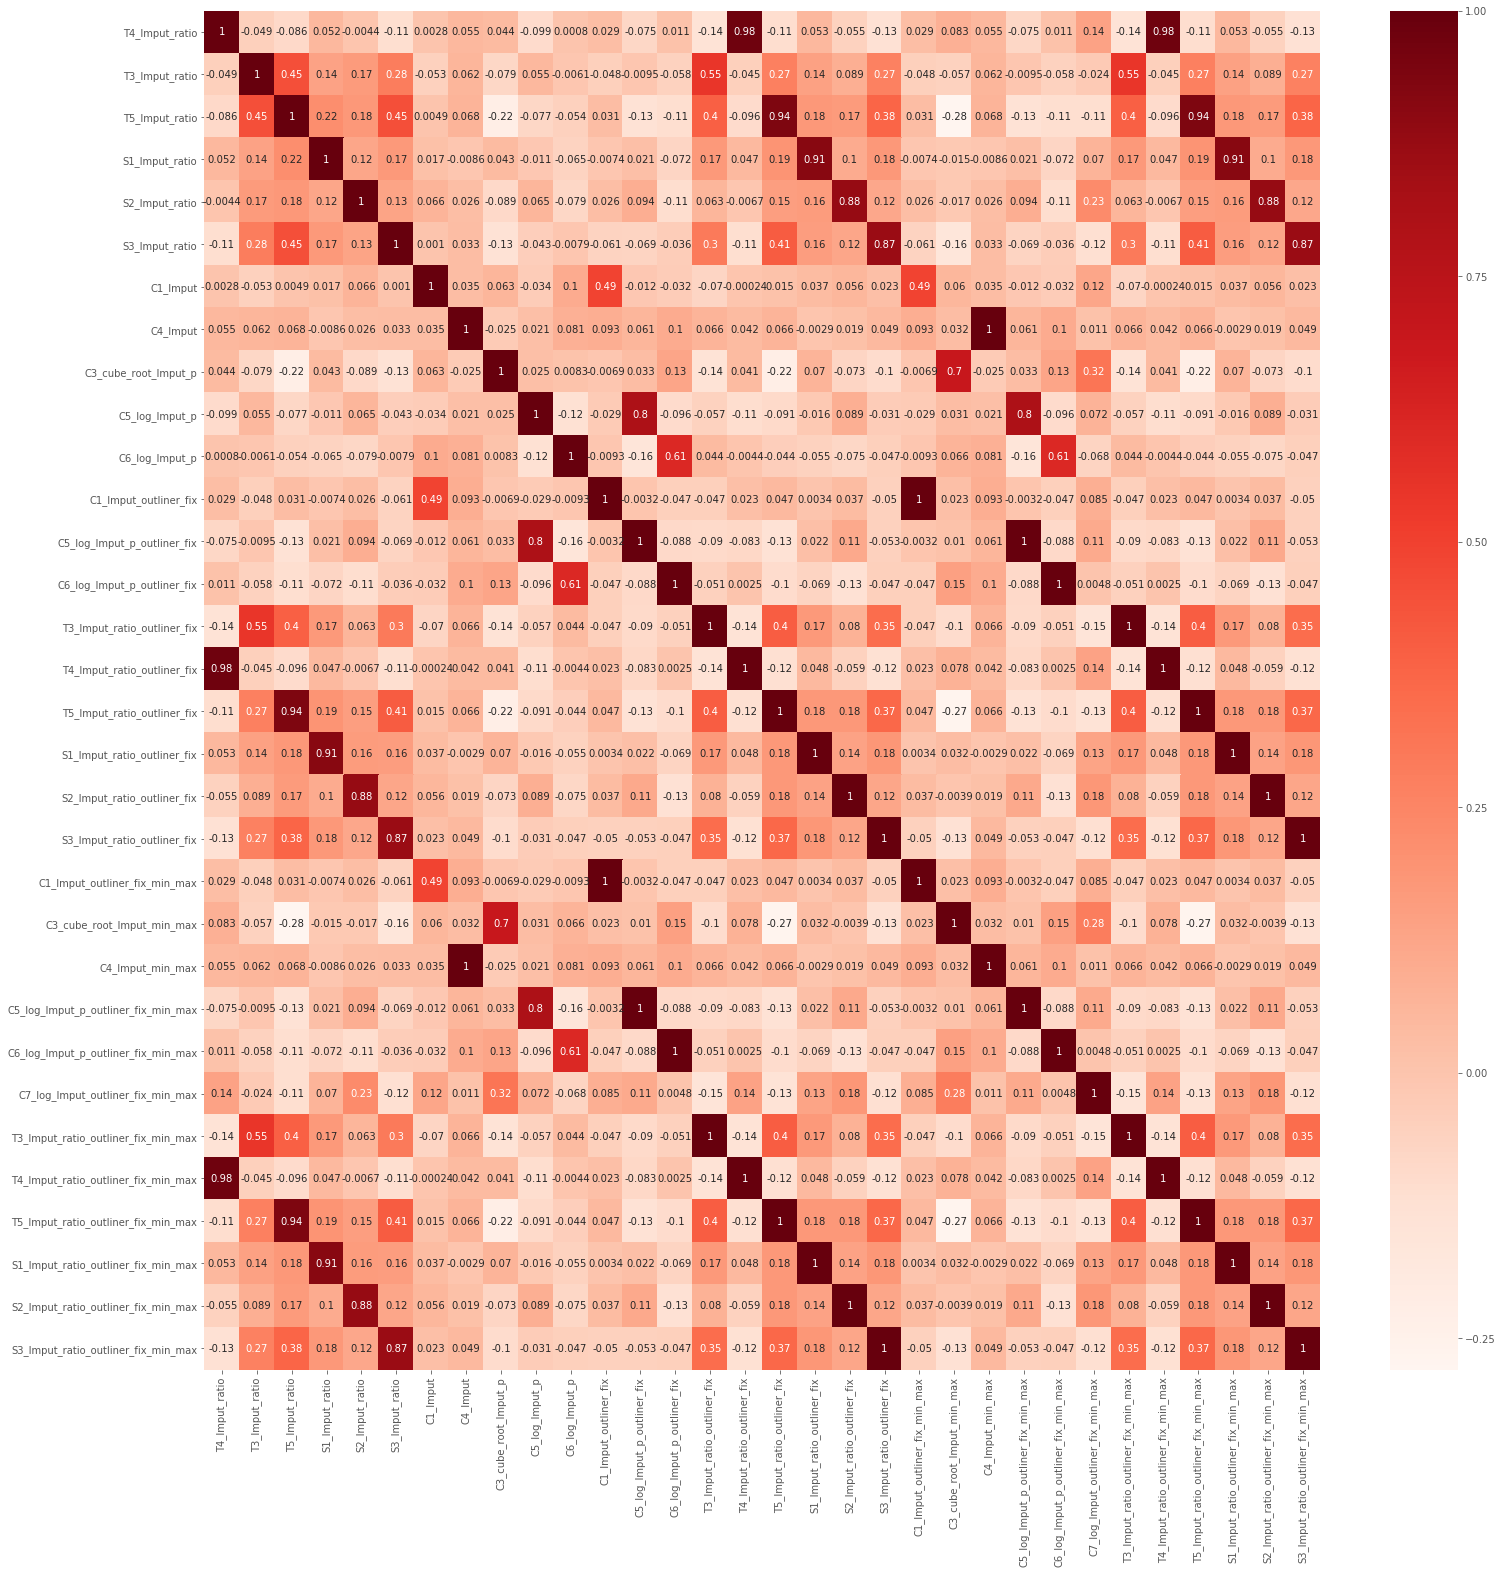

In [37]:
plt.figure(figsize= (25,25))
corr = data_min_max_filtered.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.Reds)
plt.show()

# Z-score pipline

In [6]:
data_z = pd.read_csv('https://raw.githubusercontent.com/Farisalenezy/project1-fae-master/master/data_imputed_outliers_fixed_cube_root_zscore.csv?token=ANCTJUJK2W6GGPWKOTZ23IK6KXMLI')

In [7]:
# pick the columns that you want
filter_data_z=['I1', 'I2', 'I3', 'P(IPO)', 'P(H)',
       'P(L)', 'P(1Day)', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2',
       'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I3_Imput', 'division',
       'div_manufacturing', 'div_other', 'div_services', 'T1_Imput',
       'T2_Imput', 'T3_Imput', 'T4_Imput', 'T5_Imput', 'S1_Imput', 'S2_Imput',
       'S3_Imput', 'T4_Imput_ratio', 'T3_Imput_ratio', 'T5_Imput_ratio',
       'S1_Imput_ratio', 'S2_Imput_ratio', 'S3_Imput_ratio', 'P(1Day)_Imput',
       'P(H)_Imput', 'P(L)_Imput', 'P(IPO)_Imput', 'P(mid)', 'Y1', 'Y2',
       'C1_Imput', 'C2_Imput', 'C3_Imput', 'C4_Imput', 'C5_Imput', 'C6_Imput',
       'C7_Imput', 'C3_Imput_p', 'C5_Imput_p', 'C6_Imput_p',
       'C1_Imput_outliner_fix', 'C5_Imput_p_outliner_fix',
       'C6_Imput_p_outliner_fix', 'C7_Imput_outliner_fix',
       'T3_Imput_ratio_outliner_fix', 'T4_Imput_ratio_outliner_fix',
       'T5_Imput_ratio_outliner_fix', 'S1_Imput_ratio_outliner_fix',
       'S2_Imput_ratio_outliner_fix', 'S3_Imput_ratio_outliner_fix',
       'C6_Imput_p_outliner_fix_cube_root', 'C7_Imput_outliner_fix_cube_root',
       'C1_Imput_outliner_fix_zscore', 'C3_Imput_p_zscore', 'C4_Imput_zscore',
       'C5_Imput_p_outliner_fix_zscore',
       'C6_Imput_p_outliner_fix_cube_root_zscore',
       'C7_Imput_outliner_fix_cube_root_zscore',
       'T3_Imput_ratio_outliner_fix_zscore',
       'T4_Imput_ratio_outliner_fix_zscore',
       'T5_Imput_ratio_outliner_fix_zscore',
       'S1_Imput_ratio_outliner_fix_zscore',
       'S2_Imput_ratio_outliner_fix_zscore',
       'S3_Imput_ratio_outliner_fix_zscore']
data_z_filtered = data_z[filter_data_z]
data_z_filtered.head(2)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C4_Imput_zscore,C5_Imput_p_outliner_fix_zscore,C6_Imput_p_outliner_fix_cube_root_zscore,C7_Imput_outliner_fix_cube_root_zscore,T3_Imput_ratio_outliner_fix_zscore,T4_Imput_ratio_outliner_fix_zscore,T5_Imput_ratio_outliner_fix_zscore,S1_Imput_ratio_outliner_fix_zscore,S2_Imput_ratio_outliner_fix_zscore,S3_Imput_ratio_outliner_fix_zscore
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.87,122.0,1.0,3.43,...,0.654566,0.010215,1.304068,-0.638509,0.677036,0.170850,0.334955,-0.215613,0.171342,-0.157634
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.25,259.0,0.0,-1.62,...,-0.619777,0.724532,-0.787904,-0.974205,0.141838,0.234465,-0.110184,-1.290951,0.957802,-0.180627
